In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_df = pd.read_csv("customers.csv")
transaction_df = pd.read_csv("transactions.csv")
product_df = pd.read_csv("Products.csv")


In [3]:
customer_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [4]:
product_df

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [5]:
transaction_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [6]:
customer_df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [7]:
transaction_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [8]:
product_df.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [9]:
customer_df.duplicated().sum()


0

In [10]:
product_df.duplicated().sum()

0

In [11]:
transaction_df.duplicated().sum()

0

In [12]:
combine_df1 = pd.merge(transaction_df,customer_df, on = 'CustomerID',how = 'inner')

In [13]:
combine_df1

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


In [14]:
final_df= pd.merge(combine_df1,product_df, on = ["ProductID","Price"],how = 'inner')

In [15]:
final_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics


In [16]:
final_df['TransactionDate'] = pd.to_datetime(final_df['TransactionDate'])
final_df['SignupDate'] = pd.to_datetime(final_df['SignupDate'])

In [17]:
final_df['TYear'] = final_df['TransactionDate'].dt.year
final_df['TMonth'] = final_df['TransactionDate'].dt.month
final_df['Ttime'] = final_df['TransactionDate'].dt.time
final_df = final_df.drop('TransactionDate',axis = 1)

final_df['SYear'] = final_df['SignupDate'].dt.year
final_df['Smonth'] = final_df['SignupDate'].dt.month
final_df= final_df.drop('SignupDate',axis = 1)

In [18]:
final_df['SYear'] = final_df['SYear'].astype('str')
final_df['TYear'] = final_df['TYear'].astype('str')
final_df['TMonth'] = final_df['TMonth'].astype('str')
final_df['Smonth'] = final_df['Smonth'].astype('str')

In [19]:
final_df

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price,CustomerName,Region,ProductName,Category,TYear,TMonth,Ttime,SYear,Smonth
0,T00001,C0199,P067,1,300.68,300.68,Andrea Jenkins,Europe,ComfortLiving Bluetooth Speaker,Electronics,2024,8,12:38:23,2022,12
1,T00112,C0146,P067,1,300.68,300.68,Brittany Harvey,Asia,ComfortLiving Bluetooth Speaker,Electronics,2024,5,22:23:54,2024,9
2,T00166,C0127,P067,1,300.68,300.68,Kathryn Stevens,Europe,ComfortLiving Bluetooth Speaker,Electronics,2024,4,07:38:55,2024,4
3,T00272,C0087,P067,2,601.36,300.68,Travis Campbell,South America,ComfortLiving Bluetooth Speaker,Electronics,2024,3,22:55:37,2024,4
4,T00363,C0070,P067,3,902.04,300.68,Timothy Perez,Europe,ComfortLiving Bluetooth Speaker,Electronics,2024,3,15:10:10,2022,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,1,459.86,459.86,Jacob Holt,South America,SoundWave Smartwatch,Electronics,2024,10,08:30:27,2022,1
996,T00759,C0059,P037,3,1379.58,459.86,Mrs. Kimberly Wright,North America,SoundWave Smartwatch,Electronics,2024,6,02:15:24,2024,4
997,T00922,C0018,P037,4,1839.44,459.86,Tyler Haynes,North America,SoundWave Smartwatch,Electronics,2024,4,13:05:32,2024,9
998,T00959,C0115,P037,2,919.72,459.86,Joshua Hamilton,Asia,SoundWave Smartwatch,Electronics,2024,9,10:16:02,2024,11


In [20]:
final_df['Category'].value_counts()

Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64

In [21]:
final_df['ProductID'].value_counts()

ProductID
P059    19
P029    17
P062    16
P079    16
P054    16
        ..
P024     5
P014     4
P031     4
P044     4
P099     4
Name: count, Length: 100, dtype: int64

In [22]:
final_df['CustomerID'].value_counts()

CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
         ..
C0058     1
C0014     1
C0151     1
C0078     1
C0110     1
Name: count, Length: 199, dtype: int64

In [23]:
final_df['TransactionID'].value_counts()

TransactionID
T00001    1
T00134    1
T00630    1
T00899    1
T00096    1
         ..
T00416    1
T00471    1
T00566    1
T00662    1
T00992    1
Name: count, Length: 1000, dtype: int64

In [24]:
final_df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'Quantity', 'TotalValue',
       'Price', 'CustomerName', 'Region', 'ProductName', 'Category', 'TYear',
       'TMonth', 'Ttime', 'SYear', 'Smonth'],
      dtype='object')

In [25]:
final_df.dtypes

TransactionID     object
CustomerID        object
ProductID         object
Quantity           int64
TotalValue       float64
Price            float64
CustomerName      object
Region            object
ProductName       object
Category          object
TYear             object
TMonth            object
Ttime             object
SYear             object
Smonth            object
dtype: object

In [26]:
numerical_features = [feature for feature in final_df.columns if final_df[feature].dtypes !='O']

In [27]:
numerical_features

['Quantity', 'TotalValue', 'Price']

In [28]:
categorical_features = [feature for feature in final_df.columns if final_df[feature].dtypes =='O']

In [29]:
categorical_features

['TransactionID',
 'CustomerID',
 'ProductID',
 'CustomerName',
 'Region',
 'ProductName',
 'Category',
 'TYear',
 'TMonth',
 'Ttime',
 'SYear',
 'Smonth']

In [30]:
# Univariate Analysis

In [31]:
# CountPlot,

<Axes: xlabel='count', ylabel='Region'>

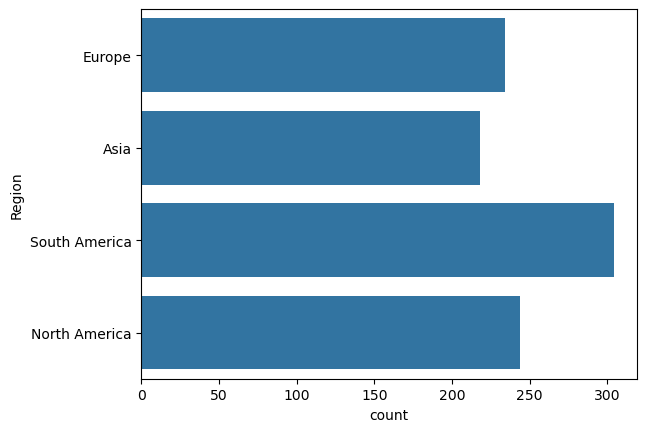

In [32]:
sns.countplot(final_df['Region'])


<Axes: xlabel='count', ylabel='Category'>

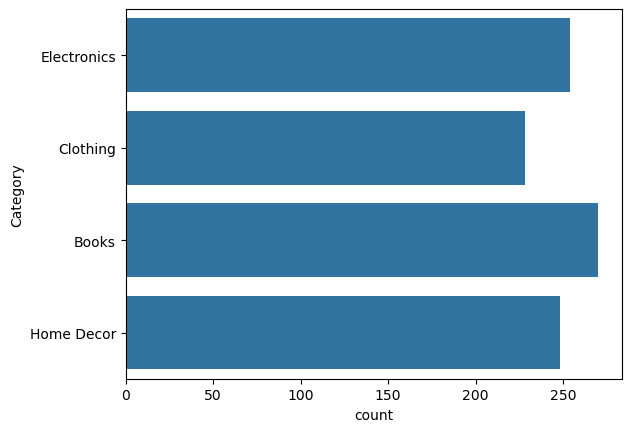

In [33]:
sns.countplot(final_df['Category'])


In [34]:
# Numerical features

(array([239.,   0.,   0., 246.,   0.,   0., 254.,   0.,   0., 261.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

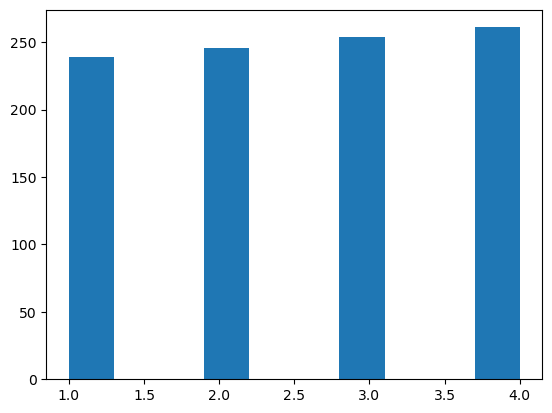

In [35]:
plt.hist(final_df['Quantity'])

(array([ 97.,  57., 175.,  20.,  68., 137.,  99.,  91., 167.,  89.]),
 array([ 16.08 ,  64.248, 112.416, 160.584, 208.752, 256.92 , 305.088,
        353.256, 401.424, 449.592, 497.76 ]),
 <BarContainer object of 10 artists>)

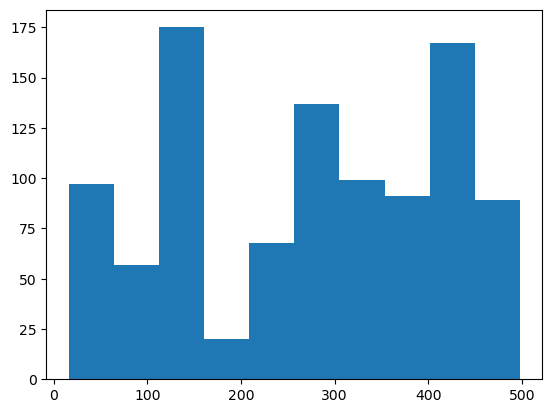

In [36]:
plt.hist(final_df['Price'])

(array([187., 188., 143.,  94., 131.,  64.,  91.,  40.,  45.,  17.]),
 array([  16.08 ,  213.576,  411.072,  608.568,  806.064, 1003.56 ,
        1201.056, 1398.552, 1596.048, 1793.544, 1991.04 ]),
 <BarContainer object of 10 artists>)

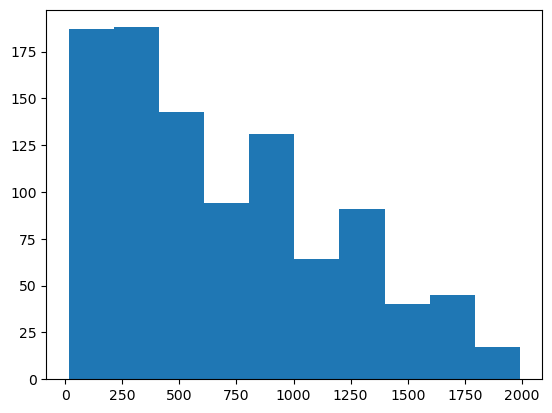

In [37]:
plt.hist(final_df['TotalValue'])

C:\Users\hp\AppData\Local\Temp\ipykernel_16472\1068620199.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

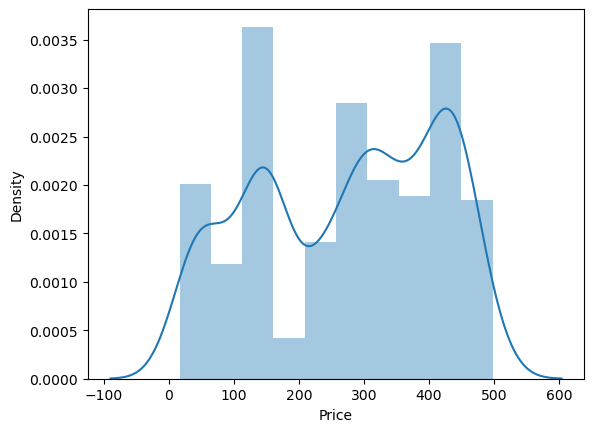

In [38]:
sns.distplot(final_df['Price'])

<Axes: ylabel='Price'>

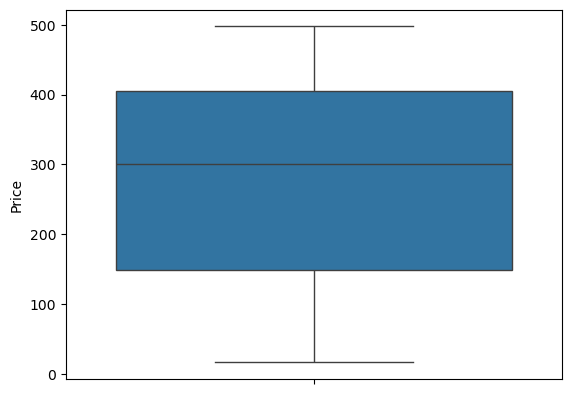

In [39]:
sns.boxplot(final_df['Price'])

<Axes: ylabel='TotalValue'>

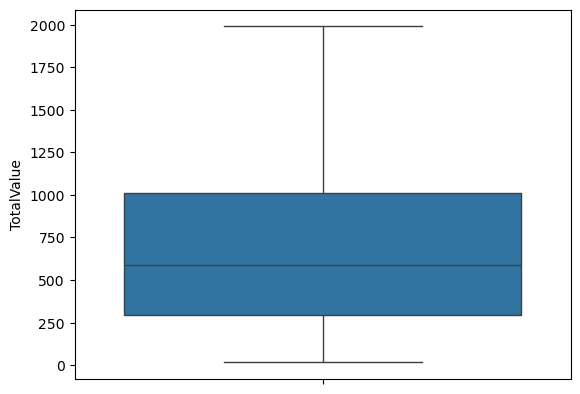

In [40]:
sns.boxplot(final_df['TotalValue'])

In [41]:
final_df['Price'].max()

497.76

In [42]:
final_df['Price'].min()

16.08

C:\Users\hp\AppData\Local\Temp\ipykernel_16472\2652980013.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['TotalValue'])


<Axes: xlabel='TotalValue', ylabel='Density'>

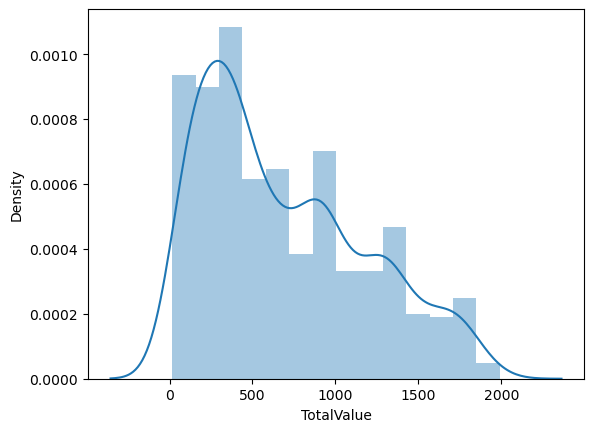

In [43]:
sns.distplot(final_df['TotalValue'])

In [44]:
final_df['TotalValue'].skew()

0.6449478912072154

In [45]:
final_df['Price'].skew()

-0.22703872386268117

In [46]:
# bivariate  and multivariate analysis

In [47]:
numerical_features

['Quantity', 'TotalValue', 'Price']

In [48]:
categorical_features

['TransactionID',
 'CustomerID',
 'ProductID',
 'CustomerName',
 'Region',
 'ProductName',
 'Category',
 'TYear',
 'TMonth',
 'Ttime',
 'SYear',
 'Smonth']

In [49]:
# numerical - categorical 

<Axes: xlabel='Category', ylabel='Price'>

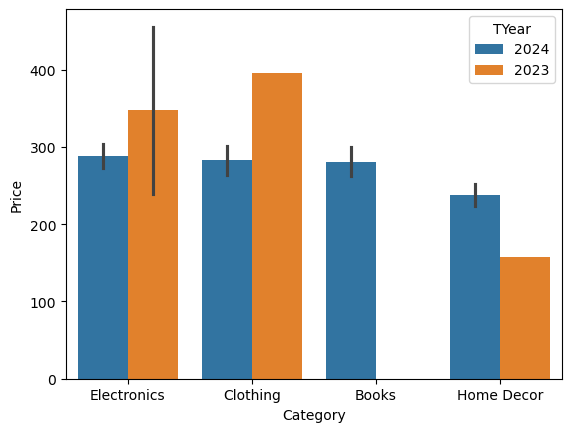

In [50]:
sns.barplot(data = final_df, x = 'Category',y = 'Price',hue = 'TYear' )

<Axes: xlabel='Region', ylabel='Price'>

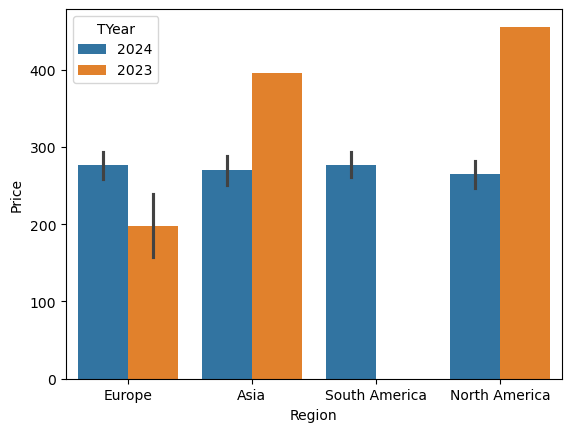

In [51]:
sns.barplot(data = final_df, x = 'Region',y = 'Price',hue = 'TYear' )

In [52]:
# using box plot

<Axes: xlabel='Category', ylabel='Price'>

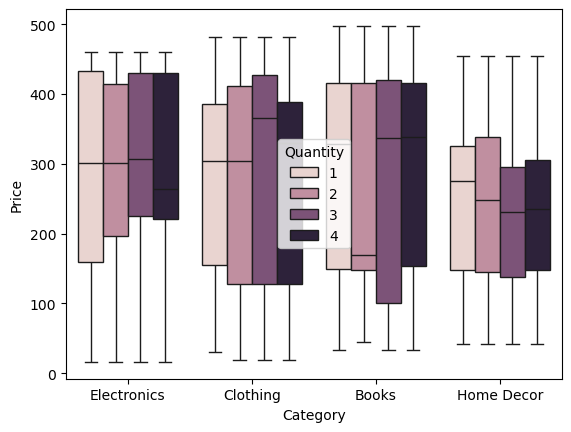

In [53]:
sns.boxplot(data = final_df, x = 'Category',y = 'Price',hue = 'Quantity')

In [54]:
# categorical - categorical

In [55]:
categorical_features

['TransactionID',
 'CustomerID',
 'ProductID',
 'CustomerName',
 'Region',
 'ProductName',
 'Category',
 'TYear',
 'TMonth',
 'Ttime',
 'SYear',
 'Smonth']

In [56]:
pd.crosstab(final_df['Region'],  final_df['Category'])

Category,Books,Clothing,Electronics,Home Decor
Region,,,,
Asia,51,58,57,52
Europe,64,47,58,65
North America,65,60,60,59
South America,90,63,79,72


<Axes: xlabel='Category', ylabel='Region'>

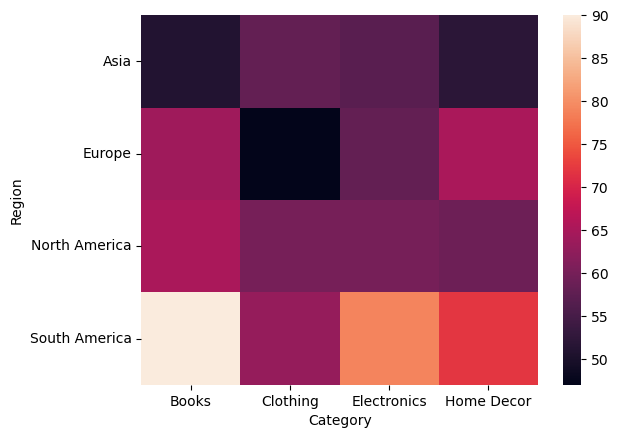

In [57]:
sns.heatmap(pd.crosstab(final_df['Region'],  final_df['Category']))

<Axes: xlabel='Region'>

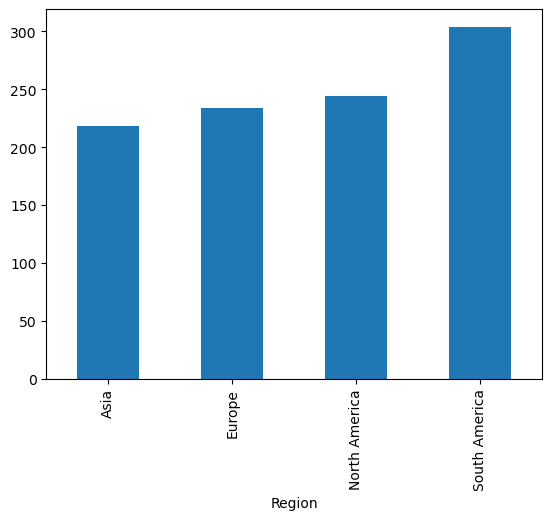

In [58]:
(final_df.groupby('Region')['SYear'].count().plot(kind = 'bar'))

<Axes: xlabel='Region'>

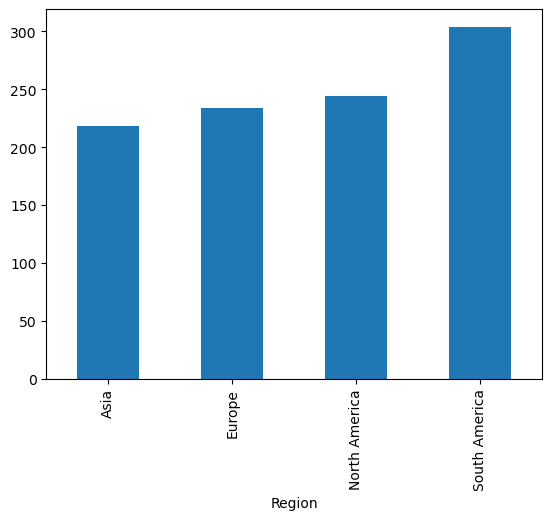

In [59]:
(final_df.groupby('Region')['TYear'].count().plot(kind = 'bar'))

<Axes: xlabel='Region'>

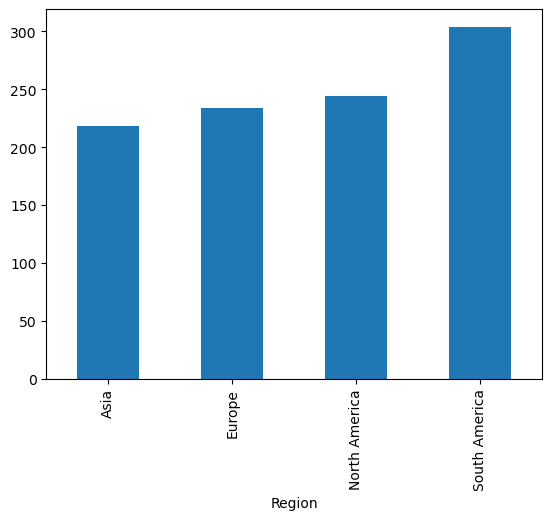

In [60]:
(final_df.groupby('Region')['SYear'].count().plot(kind = 'bar'))

<Axes: xlabel='Region'>

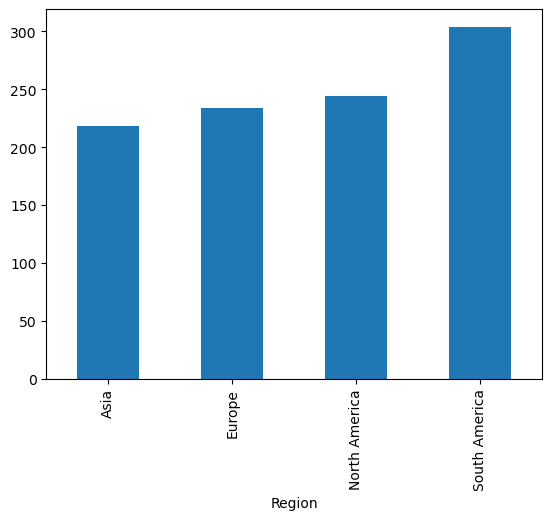

In [61]:
(final_df.groupby('Region')['Quantity'].count().plot(kind = 'bar'))

In [62]:
final_df.groupby('Category')['Quantity'].count()

Category
Books          270
Clothing       228
Electronics    254
Home Decor     248
Name: Quantity, dtype: int64

In [63]:
final_df.groupby('Region')['Quantity'].count()

Region
Asia             218
Europe           234
North America    244
South America    304
Name: Quantity, dtype: int64

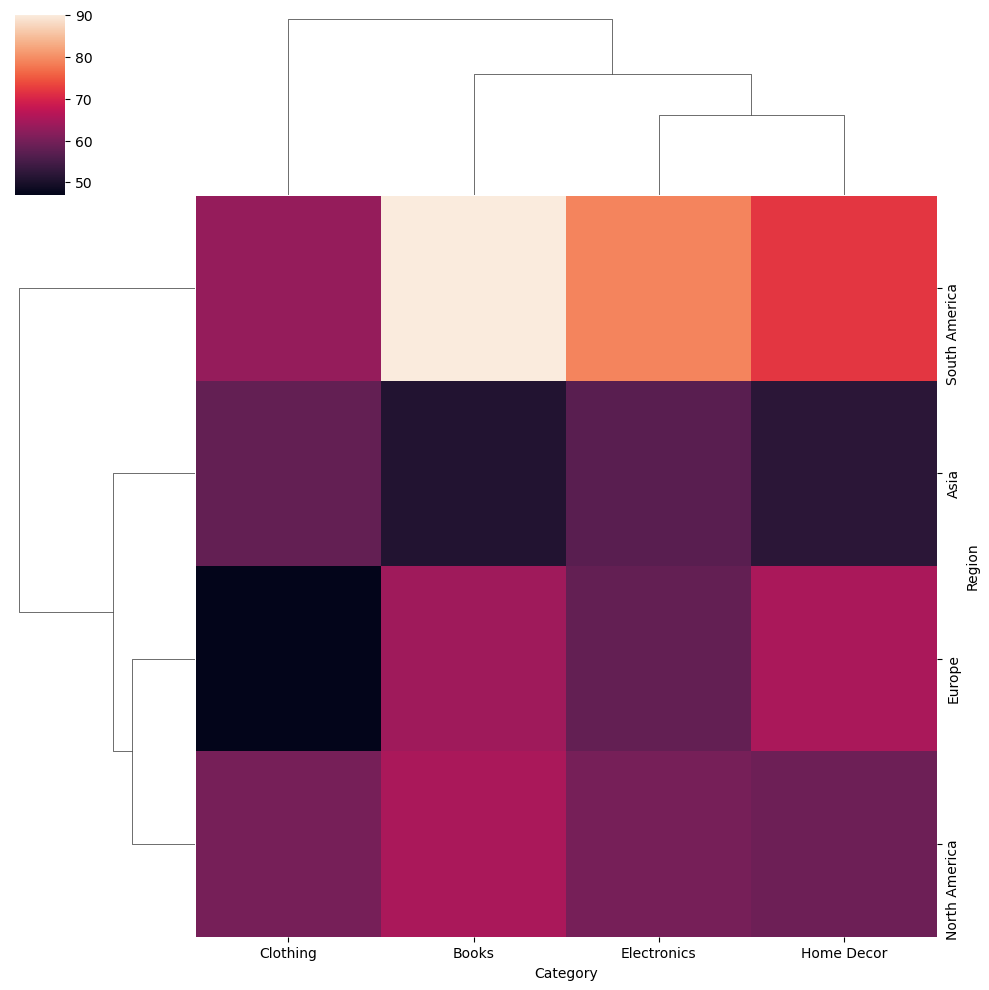

In [64]:
sns.clustermap(pd.crosstab(final_df['Region'],  final_df['Category']))

In [65]:
numerical_features

['Quantity', 'TotalValue', 'Price']

In [66]:
categorical_features

['TransactionID',
 'CustomerID',
 'ProductID',
 'CustomerName',
 'Region',
 'ProductName',
 'Category',
 'TYear',
 'TMonth',
 'Ttime',
 'SYear',
 'Smonth']

In [67]:
final_df.groupby('TMonth')['TotalValue'].sum()

TMonth
1     66376.39
10    47063.22
11    38224.37
12    62818.72
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
Name: TotalValue, dtype: float64

<Axes: xlabel='TMonth'>

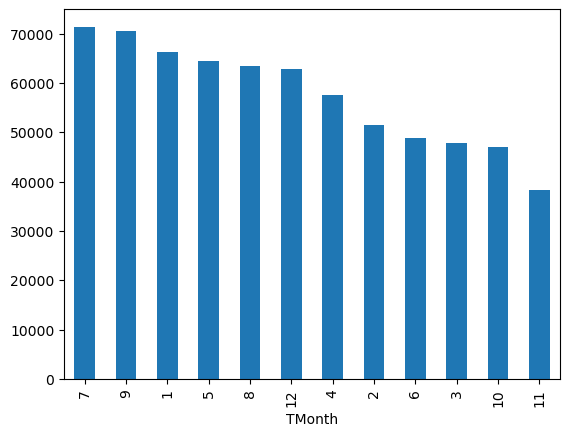

In [68]:
(final_df.groupby('TMonth')['TotalValue'].sum().sort_values(ascending = False).plot(kind='bar'))


<Axes: xlabel='Smonth'>

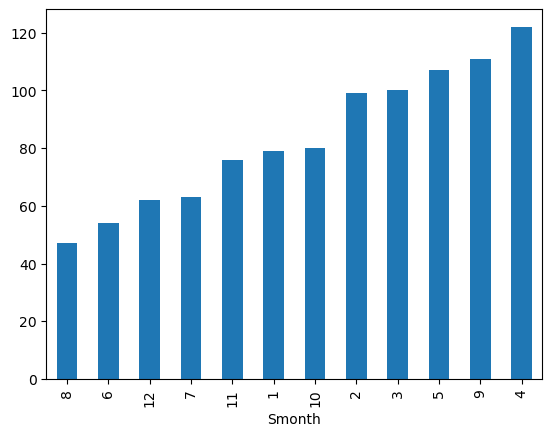

In [70]:
(final_df.groupby('Smonth')['CustomerID'].count().sort_values().plot(kind = 'bar'))

<Axes: xlabel='TMonth'>

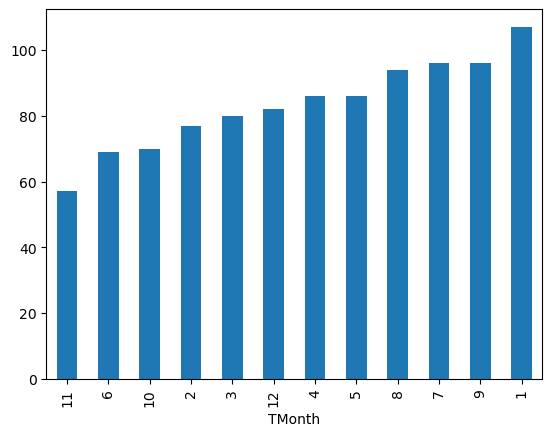

In [72]:
(final_df.groupby('TMonth')['CustomerID'].count().sort_values().plot(kind = 'bar'))

In [74]:
final_df.groupby(['Region','Category'])['TotalValue'].sum()

Region         Category   
Asia           Books          33119.03
               Clothing       49353.09
               Electronics    35658.15
               Home Decor     33944.70
Europe         Books          47464.42
               Clothing       36335.59
               Electronics    41562.60
               Home Decor     40892.02
North America  Books          41811.99
               Clothing       38038.49
               Electronics    44716.43
               Home Decor     27746.49
South America  Books          69752.03
               Clothing       42443.49
               Electronics    58846.32
               Home Decor     48310.72
Name: TotalValue, dtype: float64

<Axes: xlabel='Region,Category'>

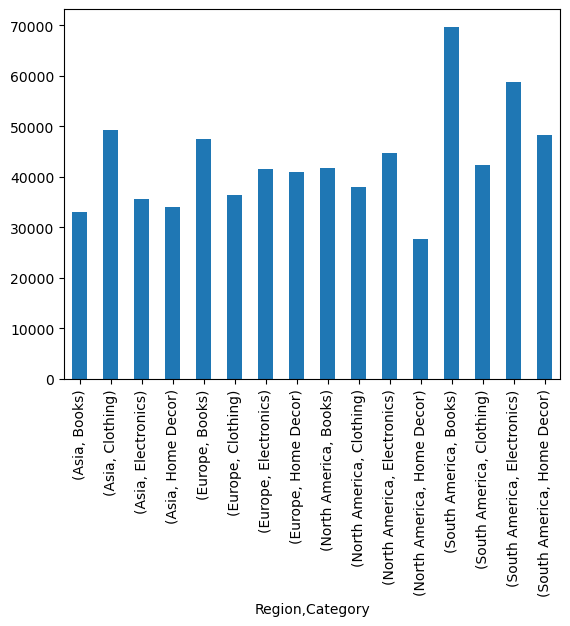

In [76]:
(final_df.groupby(['Region','Category'])['TotalValue'].sum().plot(kind = 'bar'))

In [80]:
categorical_features

['TransactionID',
 'CustomerID',
 'ProductID',
 'CustomerName',
 'Region',
 'ProductName',
 'Category',
 'TYear',
 'TMonth',
 'Ttime',
 'SYear',
 'Smonth']

<Axes: xlabel='Region,SYear'>

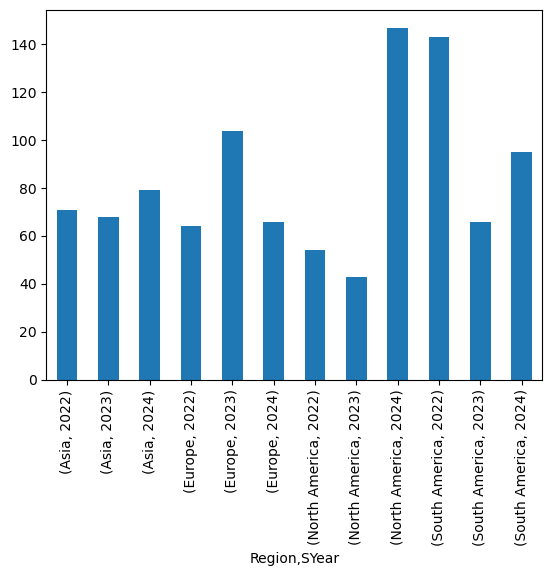

In [84]:
(final_df.groupby(['Region','SYear'])['CustomerID'].count().plot(kind = 'bar'))